In [1]:
import pandas as pd

# Load the datasets
unemployment_rate_df = pd.read_excel('Unemployment_Rate_upto_11_2020.xlsx')
unemployment_india_df = pd.read_excel('Unemployment in India.xlsx')

# Display the first few rows of each dataset
print(unemployment_rate_df.head())
print(unemployment_india_df.head())


           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-01-2020         M                             5.48   
1  Andhra Pradesh  29-02-2020         M                             5.83   
2  Andhra Pradesh  31-03-2020         M                             5.79   
3  Andhra Pradesh  30-04-2020         M                            20.51   
4  Andhra Pradesh  31-05-2020         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                                    39.18    South   
3            11336911                                    33.10    South   
4            12988845                                    36.46    South   

   Longitude  Latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     

In [2]:
# Check for missing values
print(unemployment_rate_df.isnull().sum())
print(unemployment_india_df.isnull().sum())

# Handle missing values (if any)
unemployment_rate_df = unemployment_rate_df.dropna()
unemployment_india_df = unemployment_india_df.dropna()

# Convert date columns to datetime format if necessary
unemployment_rate_df['Date'] = pd.to_datetime(unemployment_rate_df['Date'])
unemployment_india_df['Date'] = pd.to_datetime(unemployment_india_df['Date'])


Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64
Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64


<ipython-input-2-d487bb8d3c40>:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  unemployment_rate_df['Date'] = pd.to_datetime(unemployment_rate_df['Date'])
<ipython-input-2-d487bb8d3c40>:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  unemployment_india_df['Date'] = pd.to_datetime(unemployment_india_df['Date'])


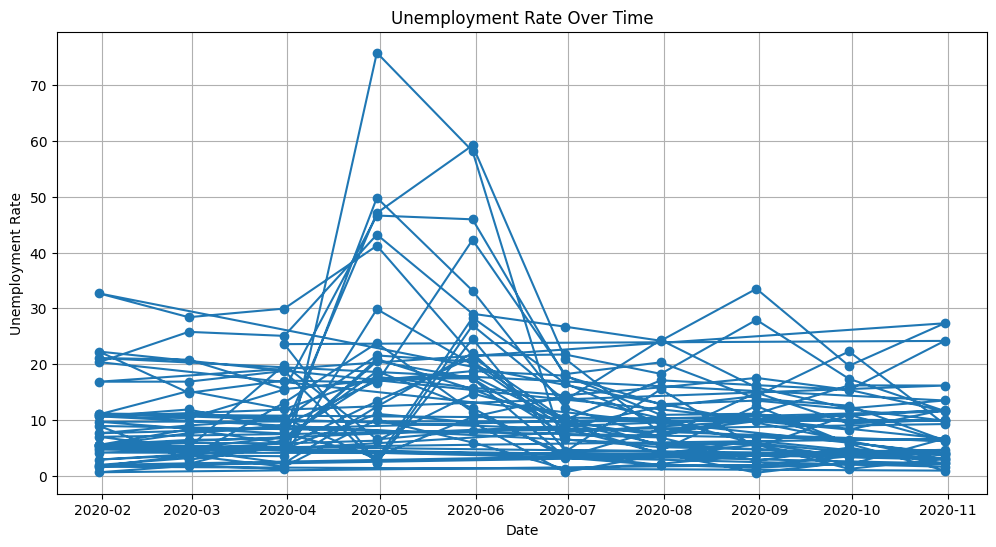

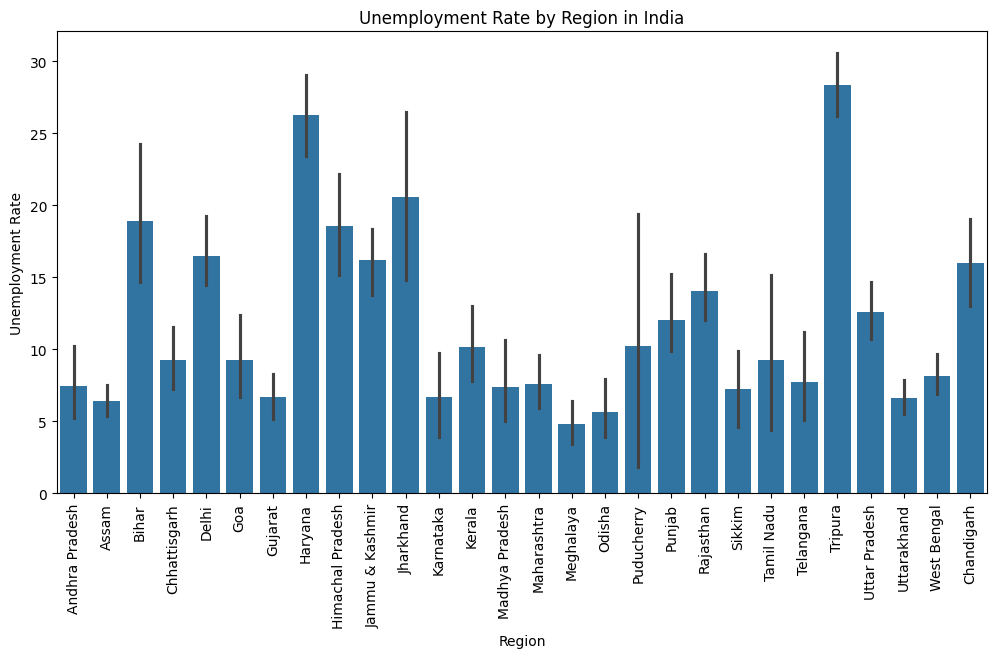

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for unemployment rate over time
plt.figure(figsize=(12, 6))
plt.plot(unemployment_rate_df['Date'], unemployment_rate_df['Estimated Unemployment Rate (%)'], marker='o')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()

# Bar plot for unemployment rates by region/state in India
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=unemployment_india_df)
plt.title('Unemployment Rate by Region in India')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=90)
plt.show()


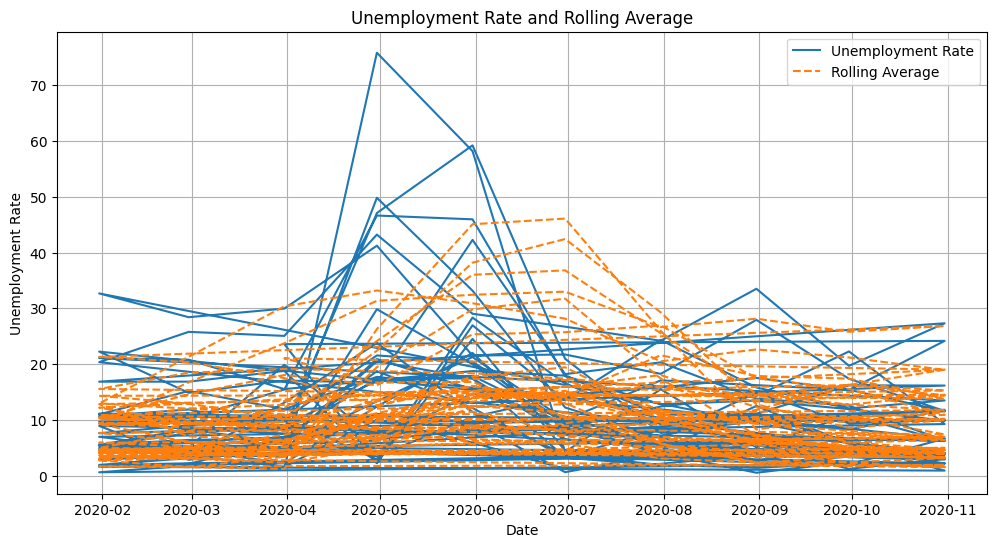

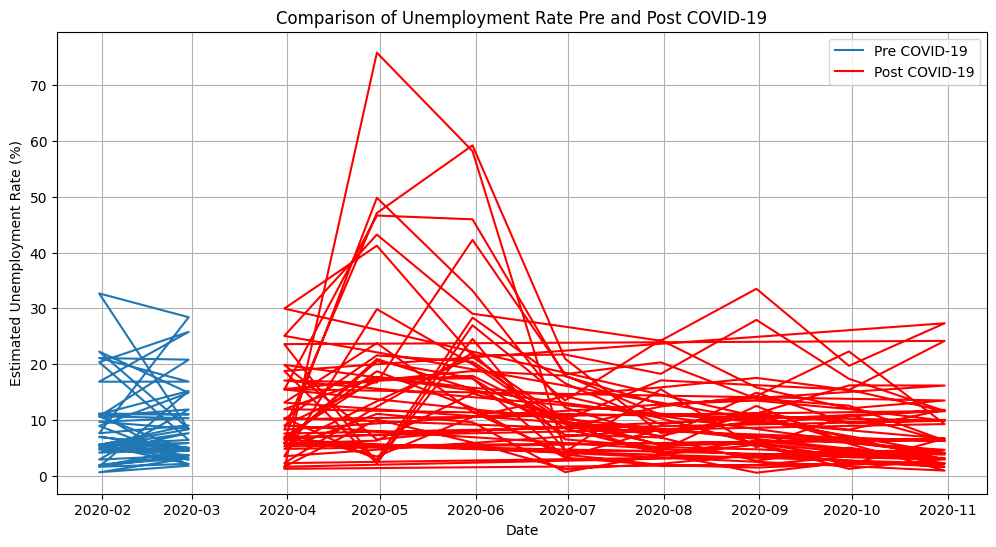

In [4]:
# Trend analysis using rolling average
unemployment_rate_df['Rolling_Avg'] = unemployment_rate_df['Estimated Unemployment Rate (%)'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(unemployment_rate_df['Date'], unemployment_rate_df['Estimated Unemployment Rate (%)'], label='Unemployment Rate')
plt.plot(unemployment_rate_df['Date'], unemployment_rate_df['Rolling_Avg'], label='Rolling Average', linestyle='--')
plt.title('Unemployment Rate and Rolling Average')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()

# Compare pre and post COVID-19 unemployment rates
pre_covid = unemployment_rate_df[unemployment_rate_df['Date'] < '2020-03-01']
post_covid = unemployment_rate_df[unemployment_rate_df['Date'] >= '2020-03-01']

plt.figure(figsize=(12, 6))
plt.plot(pre_covid['Date'], pre_covid['Estimated Unemployment Rate (%)'], label='Pre COVID-19')
plt.plot(post_covid['Date'], post_covid['Estimated Unemployment Rate (%)'], label='Post COVID-19', color='red')
plt.title('Comparison of Unemployment Rate Pre and Post COVID-19')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
print("Key Findings:")
print("1. There was a noticeable spike in the unemployment rate during the COVID-19 pandemic.")
print("2. The rolling average smooths out short-term fluctuations and highlights longer-term trends.")
print("3. Regional analysis shows varying unemployment rates across different regions in India.")


Key Findings:
1. There was a noticeable spike in the unemployment rate during the COVID-19 pandemic.
2. The rolling average smooths out short-term fluctuations and highlights longer-term trends.
3. Regional analysis shows varying unemployment rates across different regions in India.
